In this notebook we will look at (SPARCS)[https://www.health.ny.gov/statistics/sparcs/] data from calendar year 2014. SPARCS data is reported by the hospital to (New York State Department of Health)[https://www.health.ny.gov/].  For every discharge at an (Article 28 Facility)[https://www.health.ny.gov/facilities/hospital/regulations/] is included. Only a small number of fields are released to the public (data portal)[https://health.data.ny.gov/]. The elements that are released through the portal do not allow a patient to be identified. The elements meet the (HIPAA)[http://www.hhs.gov/hipaa/] (safe harbor criteria)[http://www.hhs.gov/hipaa/for-professionals/privacy/special-topics/de-identification/index.html#safeharborguidance]. NY SPARCS data is also available through AHRQ's HCUP.

The public SPARCS file data is hosted via a (Socrata)[https://www.socrata.com/] based data portal. Socrata provides a web front-end to the data and an API (Application Programming Interface). The Rest API is known as (SODA)[https://dev.socrata.com/consumers/getting-started.html] and it provides a simple SQL like syntax for querying the data set. As an example of an application that has been developed to work with SODA is the (PQI browser).

There are approximately 2 million discharges per year. Each data set contains only a year's worth of discharge data. For the example in this notebook we will look at less than 2000 records.

Kidney transplants from both living and deceased donors are complex surgeries. Unlike a majority of surgeries, like knee or hip replacement, transplants are done exclusively at inpatient facilities. Only a few hospitals in New York State have kidney transplant programs. Most hospitals that offer transplants are large university/teaching based
facilities. For patients on dialysis kidney transplants are the path to long term survival.  

The goal in this analysis is to learn if open health data can provide any insight into kidney transplants in New York State. One of the questions that we will try to quantify is if there are quantifiables differences between facilities.

In [28]:
import pandas as pd

In order to select kidney transplants we need to determine the correct code. There are two main types of codes that are available in SPARCS. There are diagnosis codes which indicate what diseases or medical issues a patient had and procedure codes which detail what was done to the patient. The Public SPARCS data only contains a single primary procedure and diangnosis code. In the full SPARCS dataset that is available to researchers there can be up to X codes. Normally, these codes are coded using ICD9-CM codes (as of October, 1 2015 ICD10-CM and PCS codes are being used). There are approximately 20,000 of these codes and often can be very details. The Public SPARCS data uses CCS (Clinical Classification Software) codes. Which transforms the number of number of codes into the 100s. For example there maybe 10 codes for diabetes that are mapped to a single CCS code. The CCS procedure code for Kidney Transplant is 105. We use this to get all discharge records for patients that got a kidney transplants as the primary procedure. 

In [29]:
kt_url = 'https://health.data.ny.gov/resource/rmwa-zns4.json?ccs_procedure_code=105&$limit=10000'
print(kt_url)

https://health.data.ny.gov/resource/rmwa-zns4.json?ccs_procedure_code=105&$limit=10000


Once we have constructed a URL to query the data source we should be able to create a `GET` request over http (hypertext transfer protocol). The HTTP protocol is how most data is transferred from a server to the client like a web browser like Chrome or Safari. 

Each data source in the Socrata environment is identified by a short string. The SPARCS 2014 data tag is `"rmwa-zns4"`. In the above request we are asking for a JSON document. JSON or Javascript Object Notation is a text based format for exchanging data in a machine readable format. One can think of JSON as a CSV format for the Internet Era. It has largely replaced the first generation XML formats that were common in early 2000's. The Pandas' library function `"read_json()"` can take a URL and makes a remote call to the Socrata server and read the response. If the URL is misspecified than an error will occur. It converts the JSON response into a dataframe. Pandas dataframes are powerful constructs for working with table based data.

In [30]:
kidney_transplants_df = pd.read_json(kt_url)

In [31]:
len(kidney_transplants_df.length_of_stay)

1169

What does data in the dataframe look like. We can use the dataframe method `head()` to get the first 10 rows of the table.

In [32]:
kidney_transplants_df.head(10)

,abortion_edit_indicator,admit_day_of_week,age_group,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_medical_surgical_description,apr_risk_of_mortality,apr_severity_of_illness_code,...,operating_provider_license_number,patient_disposition,race,source_of_payment_1,source_of_payment_2,source_of_payment_3,total_charges,total_costs,type_of_admission,zip_code_3_digits
0,N,MON,50 to 69,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,2,...,216816,Home or Self Care,White,Blue Cross/Blue Shield,Medicare,Self-Pay,164379.11,600007.65,Elective,142
1,N,THU,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Major,3,...,90003252,Home or Self Care,Black/African American,Medicare,Medicaid,Self-Pay,193742.47,617385.16,Urgent,142
2,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,1,...,216816,Home or Self Care,White,Medicare,Self-Pay,NaN,125838.17,415105.69,Elective,136
3,N,WED,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,2,...,90003252,Home or Self Care,White,Medicaid,Self-Pay,NaN,169530.27,602840.63,Elective,142
4,N,WED,50 to 69,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,2,...,216816,Home or Self Care,White,Medicare,Medicare,Self-Pay,183224.09,610949.08,Elective,140
5,N,SUN,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,2,...,269820,Home or Self Care,White,Medicare,Medicaid,NaN,166918.35,602750.72,Elective,142
6,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,2,...,216816,Home or Self Care,Black/African American,Medicare,Self-Pay,Self-Pay,164177.35,600185.78,Urgent,142
7,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,3,...,216816,Home or Self Care,White,Blue Cross/Blue Shield,Self-Pay,NaN,125849.82,415613.18,Elective,142
8,N,TUE,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,1,...,269820,Home or Self Care,White,Medicare,Self-Pay,NaN,179106.21,608262.72,Elective,142
9,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,1,...,216816,Home or Self Care,White,Blue Cross/Blue Shield,Self-Pay,NaN,121158.45,413673.49,Elective,142


In [33]:
%matplotlib inline

In [34]:
import seaborn as sb

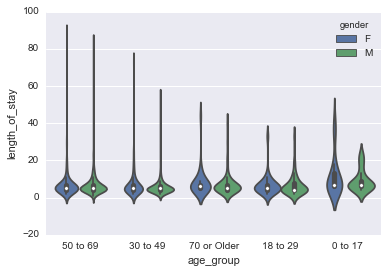

In [35]:
sb.violinplot(x="age_group", y="length_of_stay", hue="gender", data=kidney_transplants_df)

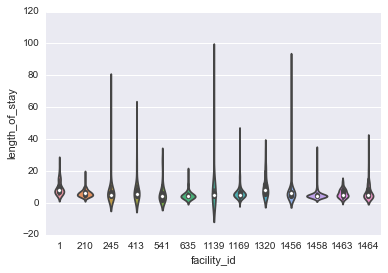

In [36]:
sb.violinplot(x="facility_id", y="length_of_stay", data=kidney_transplants_df)

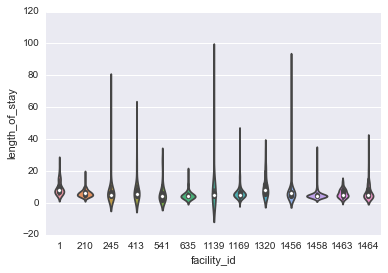

In [37]:
sb.violinplot(x="facility_id", y="length_of_stay", data=kidney_transplants_df)

In [38]:
kidney_transplants_outliers_removed_df = kidney_transplants.where(kidney_transplants_df["length_of_stay"] <= 40)

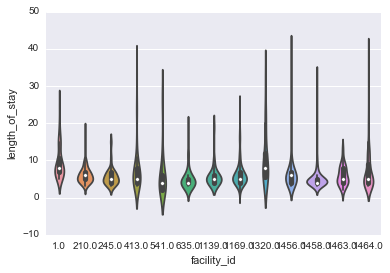

In [39]:
sb.violinplot(x="facility_id", y="length_of_stay", data=kidney_transplants_outliers_removed_df)

In [40]:
kidney_transplants_df["facility_name_with_id"] = kidney_transplants_df.apply(
    lambda x: str("000" + str(int(x["facility_id"])))[-4:] + " - " + x["facility_name"], axis=1)

In [41]:
kidney_transplants_df.groupby(["facility_name_with_id"])["length_of_stay"].mean()

facility_name_with_id
0001 - Albany Medical Center Hospital                                     9.327273
0210 - Erie County Medical Center                                         6.148649
0245 - University Hospital                                                6.762712
0413 - Strong Memorial Hospital                                           9.250000
0541 - North Shore University Hospital                                    6.137931
0635 - University Hospital SUNY Health Science Center                     5.265625
1139 - Westchester Medical Center                                         8.703704
1169 - Montefiore Medical Center - Henry & Lucy Moses Div                 6.477419
1320 - University Hospital of Brooklyn                                   10.521739
1456 - Mount Sinai Hospital                                               7.228395
1458 - New York Presbyterian Hospital - New York Weill Cornell Center     5.246445
1463 - NYU Hospitals Center                                      

In [42]:
kidney_transplants_df.groupby(["facility_name_with_id"])["length_of_stay"].count()

facility_name_with_id
0001 - Albany Medical Center Hospital                                     55
0210 - Erie County Medical Center                                         74
0245 - University Hospital                                                59
0413 - Strong Memorial Hospital                                           60
0541 - North Shore University Hospital                                    29
0635 - University Hospital SUNY Health Science Center                     64
1139 - Westchester Medical Center                                         27
1169 - Montefiore Medical Center - Henry & Lucy Moses Div                155
1320 - University Hospital of Brooklyn                                    23
1456 - Mount Sinai Hospital                                              162
1458 - New York Presbyterian Hospital - New York Weill Cornell Center    211
1463 - NYU Hospitals Center                                               25
1464 - New York Presbyterian Hospital - Columbia Presb

In [43]:
kidney_transplants_df.groupby(["patient_disposition", "facility_name"])["length_of_stay"].count()

patient_disposition                facility_name                                                 
Expired                            Montefiore Medical Center - Henry & Lucy Moses Div                  3
                                   NYU Hospitals Center                                                1
                                   New York Presbyterian Hospital - Columbia Presbyterian Center       1
                                   North Shore University Hospital                                     1
                                   University Hospital                                                 1
Home or Self Care                  Albany Medical Center Hospital                                     45
                                   Erie County Medical Center                                         71
                                   Montefiore Medical Center - Henry & Lucy Moses Div                113
                                   Mount Sinai Hospital       

In [44]:
kidney_transplants_df.groupby(["age_group"])["length_of_stay"].count()

age_group
0 to 17         48
18 to 29        74
30 to 49       369
50 to 69       582
70 or Older     96
Name: length_of_stay, dtype: int64

In [45]:
kidney_transplants_df.groupby(["age_group"])["length_of_stay"].mean()

age_group
0 to 17        10.479167
18 to 29        6.675676
30 to 49        6.203252
50 to 69        6.817869
70 or Older     7.489583
Name: length_of_stay, dtype: float64

In [46]:
kidney_transplants_df.columns

Index([            u'abortion_edit_indicator',
                         u'admit_day_of_week',
                                 u'age_group',
                              u'apr_drg_code',
                       u'apr_drg_description',
                              u'apr_mdc_code',
                       u'apr_mdc_description',
          u'apr_medical_surgical_description',
                     u'apr_risk_of_mortality',
              u'apr_severity_of_illness_code',
       u'apr_severity_of_illness_description',
         u'attending_provider_license_number',
                              u'birth_weight',
                        u'ccs_diagnosis_code',
                 u'ccs_diagnosis_description',
                        u'ccs_procedure_code',
                 u'ccs_procedure_description',
                     u'discharge_day_of_week',
                            u'discharge_year',
            u'emergency_department_indicator',
                                 u'ethnicity',
             

In [47]:
kidney_transplants_df.groupby(["patient_disposition"])["length_of_stay"].count()

patient_disposition
Expired                                7
Home or Self Care                    802
Home w/ Home Health Services         341
Hospice - Home                         1
Inpatient Rehabilitation Facility      9
Skilled Nursing Home                   9
Name: length_of_stay, dtype: int64

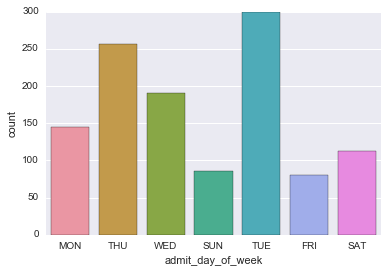

In [48]:
sb.countplot(x="admit_day_of_week", data=kidney_transplants_df)

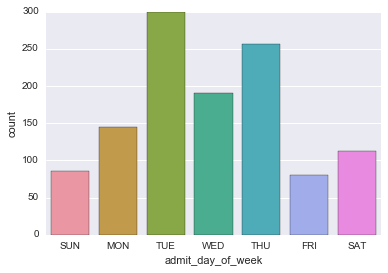

In [49]:
sb.countplot(x="admit_day_of_week", data=kidney_transplants_df, order=["SUN","MON", "TUE", "WED", "THU", "FRI", "SAT"])

In [50]:
#kidney_transplants_df.to_csv("./data/sparcs_ny_kidney_transplants_2014.csv")